# MAZ Diplomarbeit - Biodiversität in der Schweiz#

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("01_source/xls_ch/schmetterlinge_ch.csv")

In [3]:
df.head()

,GROUP,ORDER,FAMILY,GENUS,SPECIES SSP,Scientific name,Deutscher Name,CAT,Criteria,Bemerkungen
0,Insecta,Lepidoptera,Zygaenidae,Adscita,albanica,"Adscita albanica (Naufock, 1926)",Storchschnabel-Grünwidderchen,NT,NaN,Nur im Wallis
1,Insecta,Lepidoptera,Zygaenidae,Adscita,alpina,"Adscita alpina (Alberti, 1937)",Alpen-Grünwidderchen,NT,NaN,NaN
2,Insecta,Lepidoptera,Zygaenidae,Adscita,geryon,"Adscita geryon (Hübner, 1813)",Sonnenröschen-Grünwidderchen,NT,NaN,NaN
3,Insecta,Lepidoptera,Zygaenidae,Adscita,mannii,"Adscita mannii (Lederer, 1853)",Manns Grünwidderchen,CR,"B2ab (i,ii,iii,iv)",Nur in den Südalpen und im Münstertal GR
4,Insecta,Lepidoptera,Zygaenidae,Adscita,statices,"Adscita statices (Linnaeus, 1758)",Ampfer-Grünwidderchen,NT,NaN,NaN


In [4]:
len (df)

239

In [5]:
df.shape

(239, 10)

In [6]:
df["CAT"].value_counts()

LC    104
NT     44
VU     38
EN     27
CR     10
RE      3
NE      3
Name: CAT, dtype: int64

In [7]:
df.head(1)

,GROUP,ORDER,FAMILY,GENUS,SPECIES SSP,Scientific name,Deutscher Name,CAT,Criteria,Bemerkungen
0,Insecta,Lepidoptera,Zygaenidae,Adscita,albanica,"Adscita albanica (Naufock, 1926)",Storchschnabel-Grünwidderchen,NT,NaN,Nur im Wallis


In [8]:
df.rename(columns={"GROUP":"group","ORDER":"order","FAMILY":"family","GENUS":"genus","SPECIES SSP":"species","Scientific name":"sc name","Deutscher Name":"dt name","CAT":"cat", "Criteria": "criteria", "Bemerkungen":"bemerkungen"},inplace=True)

In [9]:
df.pop("criteria")
df.pop("genus")
df.pop("species")

0          albanica
1            alpina
2            geryon
3            mannii
4          statices
5           urticae
6          infausta
7        cardamines
8       euphenoides
9              ilia
10             iris
11       hyperantus
12         crataegi
13           levana
14         arethusa
15           adippe
16           aglaja
17            niobe
18          pandora
19           paphia
20          agestis
21       artaxerxes
22          eumedon
23           nicias
24      aquilonaris
25              dia
26       euphrosyne
27           napaea
28            pales
29           selene
           ...     
209          ilicis
210           pruni
211           spini
212         w-album
213          ferula
214           orion
215       sertorius
216         betulae
217          acteon
218         lineola
219      sylvestris
220        atalanta
221          cardui
222        polyxena
223       angelicae
224      carniolica
225       ephialtes
226         exulans
227          fausta


In [10]:
df['einteilung'] = 'Insekten'
df['untergruppe'] = 'Schmetterlinge'


In [11]:
df.head()

,group,order,family,sc name,dt name,cat,bemerkungen,einteilung,untergruppe
0,Insecta,Lepidoptera,Zygaenidae,"Adscita albanica (Naufock, 1926)",Storchschnabel-Grünwidderchen,NT,Nur im Wallis,Insekten,Schmetterlinge
1,Insecta,Lepidoptera,Zygaenidae,"Adscita alpina (Alberti, 1937)",Alpen-Grünwidderchen,NT,NaN,Insekten,Schmetterlinge
2,Insecta,Lepidoptera,Zygaenidae,"Adscita geryon (Hübner, 1813)",Sonnenröschen-Grünwidderchen,NT,NaN,Insekten,Schmetterlinge
3,Insecta,Lepidoptera,Zygaenidae,"Adscita mannii (Lederer, 1853)",Manns Grünwidderchen,CR,Nur in den Südalpen und im Münstertal GR,Insekten,Schmetterlinge
4,Insecta,Lepidoptera,Zygaenidae,"Adscita statices (Linnaeus, 1758)",Ampfer-Grünwidderchen,NT,NaN,Insekten,Schmetterlinge


In [12]:
df["cat"].value_counts()

LC    104
NT     44
VU     38
EN     27
CR     10
RE      3
NE      3
Name: cat, dtype: int64

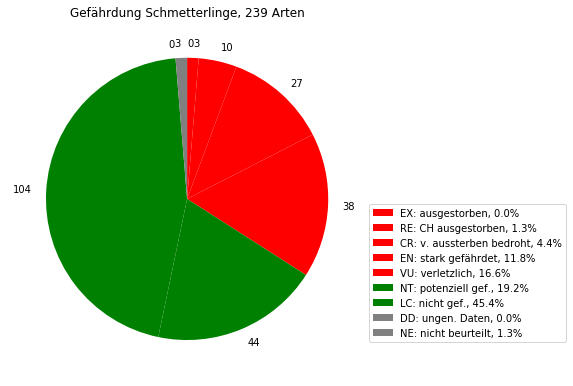

In [13]:
values = [0, 3, 10, 27, 38, 44, 104, 0, 3]
colors = ['r', 'r', 'r', 'r', 'r', 'g', "g", "grey", "grey"]
labels = [
    'EX: ausgestorben', 'RE: CH ausgestorben',
    'CR: v. aussterben bedroht', 'EN: stark gefährdet', 
    'VU: verletzlich',"NT: potenziell gef.",
    "LC: nicht gef.","DD: ungen. Daten","NE: nicht beurteilt"]


fig1, ax1 = plt.subplots(figsize=(7, 6))
fig1.subplots_adjust(0.3,0,1,1)
plt.pie(values, colors=colors, labels= values, counterclock=False,startangle=90)
plt.title('Gefährdung Schmetterlinge, 239 Arten')

total = sum(values)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, values)],
    
    bbox_to_anchor=(1.0, 0.5),
    bbox_transform=fig1.transFigure
)
plt.show()